# Labolatorium 10 Dyskretna Transformacja Fouriera
### Autor: Krzysztof Hardek

In [216]:
import numpy as np
from matplotlib import pyplot as plt
import cmath
from scipy import linalg
import time

## Zad 1 FFT
### Funkcja realizująca DFT

In [217]:
def f_matrix(n):
    F = np.zeros((n, n), dtype=complex)
    
    for i in range(n):
        for j in range(n):
            real = np.cos(2 * np.pi / n)
            img = -np.sin(2 * np.pi / n)
            c = complex(real, img)
            F[i][j] = c ** (i * j)
            
    return F

def DFT(y):
    F = f_matrix(len(y))
    
    return F @ y
    

### Funkcja realizująca IDFT

In [218]:
def IDFT(y):
    n = len(y)
    
    F = f_matrix(n)
    y_conj = np.conj(y)
    
    return np.conj(F @ y_conj) / n

#### Sprawdzenie poprawności
Sprawdzę różnice w wyliczonych DFT oraz róznice y i IDFT(DFT(y)) dla mojej implementacji oraz bibliotecznej

In [219]:
def test(n):
    y = np.random.rand(n)
    y_complex = np.array(y, dtype=complex)
    
    lib_dft = np.fft.fft(y)
    lib_idft = np.fft.ifft(lib_dft)
    
    my_dft = DFT(y)
    my_idft = IDFT(my_dft)
    
    print('DFT difference')
    print(my_dft - lib_dft)
    print('y - IDFT')
    print('my')
    print(y_complex - my_idft)
    print('lib')
    print(y_complex - lib_idft)
    print('\n\n')

In [220]:
test(4)
test(8)
test(16)
test(32)

DFT difference
[ 0.00000000e+00+0.00000000e+00j -1.31838984e-16-1.11022302e-16j
  1.11022302e-16-1.86767940e-16j  2.84494650e-16-2.22044605e-16j]
y - IDFT
my
[ 0.00000000e+00+1.30104261e-16j  1.11022302e-16+5.63785130e-17j
  1.11022302e-16-4.16333634e-17j -1.11022302e-16-1.38777878e-16j]
lib
[1.11022302e-16+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j]



DFT difference
[ 4.44089210e-16+0.00000000e+00j -4.44089210e-16-3.60822483e-16j
 -4.44089210e-16+0.00000000e+00j  5.27355937e-16-7.77156117e-16j
  2.22044605e-16+1.18900305e-16j -9.15933995e-16-1.66533454e-15j
  1.33226763e-15-1.11022302e-16j  2.60902411e-15-2.08166817e-15j]
y - IDFT
my
[-3.33066907e-16+6.07153217e-16j  0.00000000e+00+4.30211422e-16j
  2.49800181e-16+1.87350135e-16j  2.22044605e-16-6.24500451e-17j
  0.00000000e+00-2.44704430e-16j  2.77555756e-17-4.51028104e-16j
 -2.77555756e-16-6.45317133e-16j -9.99200722e-16-8.11850587e-16j]
lib
[ 0.00000000e+00+0.j -1.11022302e-16+0.j  5.55111512e-17+0.j
 -1.1102230

#### Wnioski
W obydwóch implementacjach jest pewna niewielka różnica pomiędzy y a IDFT(DFT(y). Musi ona występować ze względu na niedokładną reprezentację liczb. Wyliczone DFT nie są identyczne, wynika to z tego, że w funkcji bibliotecznej używany jest inny algorytm (FFT), który wykonuje inną liczbę operacji (mniejsza złożoność), więc wyniki muszą się trochę różnić. Mimo wszystko funkcja biblioteczna sprawuje się nieco lepiej od mojej, ale róznice są niewielkie 

### Algorytm Cooleya-Turkeya

In [221]:
def FFT(y):
    y = y[:]
    n = len(y)
    
    if n <= 1:
        return y
    else:
        y_even = FFT(y[::2])
        y_odd = FFT(y[1::2])
        f = np.exp(-2j * np.pi * np.arange(n) / n)
        return np.concatenate([y_even + f[:int(n / 2)] * y_odd,
                               y_even + f[int(n / 2):] * y_odd])

#### Testowanie

In [222]:
def test_fft(n):
    y = np.random.rand(n)
    
    start_time = time.time()
    
    FFT(y)
    my_fft_time = time.time()
    
    np.fft.fft(y)
    lib_time = time.time()
    
    DFT(y)
    my_dft_time = time.time()
    
    print(f'size:{n}')
    print(f'my dff: {my_fft_time - start_time}')
    print(f'lib: {lib_time - my_fft_time}')
    print(f'my dft: {my_dft_time - lib_time}')
    print('\n')

In [223]:
for power in range(5, 12):
    test_fft(2 ** power)

size:32
my dff: 0.0009105205535888672
lib: 3.123283386230469e-05
my dft: 0.00576472282409668


size:64
my dff: 0.002015829086303711
lib: 3.123283386230469e-05
my dft: 0.02265620231628418


size:128
my dff: 0.002685070037841797
lib: 3.814697265625e-05
my dft: 0.08835053443908691


size:256
my dff: 0.005723237991333008
lib: 4.7206878662109375e-05
my dft: 0.3550145626068115


size:512
my dff: 0.013737201690673828
lib: 6.127357482910156e-05
my dft: 1.3950221538543701


size:1024
my dff: 0.027662277221679688
lib: 0.0001544952392578125
my dft: 5.633782386779785


size:2048
my dff: 0.04202389717102051
lib: 0.00011515617370605469
my dft: 21.719351053237915




#### Wnioski
Moja własna implementacja oraz biblioteczna FFT dają znacznie lepsze rezultaty niż prosty DFT. Dla rozmiaru 2 ** 11 rozwiązanie wykorzystujące mnożenie macierzy wykonuje się pięć rzędów wielkości dłużej. Jeśli chodzi o różnice samych FFT, to funkcja biblioteczna zdaje się być około trzy rzędy wielkości szybsza. Możliwe że wprowadzone zostały tam usprawnienia, takie jak użycie prostego DFT poniżej pewnego rozmiaru, użycie iteracyjnej implementacji lub wprowadzanie równoległego obliczania.  

## Zad 2 DFT w 1D
### Generowanie sygnałów

In [224]:
def sin(t, w, A):
    return A * np.sin(t*w)    

In [225]:
t_arr = range(1, 101)
w = [1, 2, 0.5, 3, 0.2]

a = [sin(t, w[0], 1) + sin(t, w[1], 1) + sin(t, w[2], 1) + sin(t, w[3], 1) + sin(t, w[4], 1) 
     for t in t_arr]

b = [sin(t, w[int((t-1)/20)], 1) for t in t_arr]


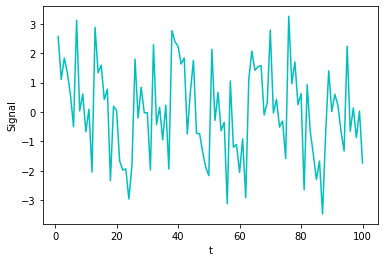

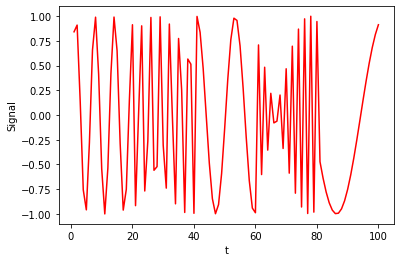

In [226]:
plt.plot(t, a, color='c')
plt.xlabel('t')
plt.ylabel('Signal')
plt.show()

plt.plot(t, b, color='r')
plt.xlabel('t')
plt.ylabel('Signal')
plt.show()

### Transformacja do domeny częstotliwościowej
Sygnał a

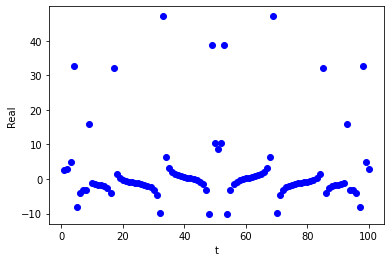

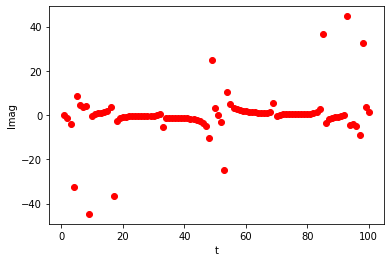

In [227]:
af = np.fft.fft(a)
bf = np.fft.fft(b)

plt.scatter(t, np.real(af), color='b')
plt.xlabel('t')
plt.ylabel('Real')
plt.show()

plt.scatter(t, np.imag(af), color='r')
plt.xlabel('t')
plt.ylabel('Imag')
plt.show()


Sygnał b

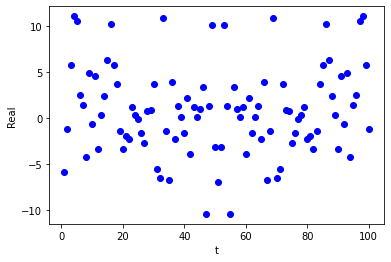

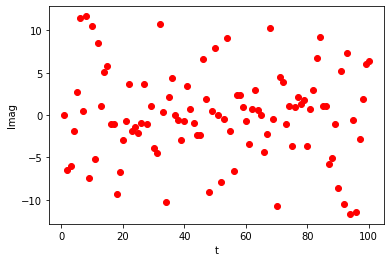

In [228]:
plt.scatter(t, np.real(bf), color='b')
plt.xlabel('t')
plt.ylabel('Real')
plt.show()

plt.scatter(t, np.imag(bf), color='r')
plt.xlabel('t')
plt.ylabel('Imag')
plt.show()

### Wnioski
Wykresy części rzeczywistej wykazują symetrie osiową, a wykresy części urojonej - punktową. Wykres przebiegu sygnału a (tego z nałożonymi sygnałami) wydaje się być dużo bardziej przejrzysty i nadający sie do analizy.